## 1. Candy Crush Saga
<p><a href="https://king.com/game/candycrush">Candy Crush Saga</a> is a hit mobile game developed by King (part of Activision|Blizzard) that is played by millions of people all around the world. Candy Crush has more than 3000 levels, and new ones are added every week. And with that many levels, it's important to get <em>level difficulty</em> just right. Too easy and the game gets boring, too hard and players become frustrated and quit playing. In this project, I will see how we can use data collected from players to estimate level difficulty. </p>

In [10]:
# This sets the size of plots to a good default.
options(repr.plot.width = 5, repr.plot.height = 4)

# Loading in packages
install.packages("readr")
library(readr)
install.packages("dplyr")
library(dplyr)
install.packages("ggplot2")
library(ggplot2)


The downloaded binary packages are in
	/var/folders/zz/k36s8yhd6318k7y1vnt48flc0000gn/T//RtmpEcasES/downloaded_packages

The downloaded binary packages are in
	/var/folders/zz/k36s8yhd6318k7y1vnt48flc0000gn/T//RtmpEcasES/downloaded_packages

The downloaded binary packages are in
	/var/folders/zz/k36s8yhd6318k7y1vnt48flc0000gn/T//RtmpEcasES/downloaded_packages


## 2. The data set
<p>The dataset we will use contains one week of data from a sample of players who played Candy Crush back in 2014. The data is also from a single <em>episode</em>, that is, a set of 15 levels. It has the following columns:</p>
<ul>
<li><strong>player_id</strong>: a unique player id</li>
<li><strong>dt</strong>: the date</li>
<li><strong>level</strong>: the level number within the episode, from 1 to 15.</li>
<li><strong>num_attempts</strong>: number of level attempts for the player on that level and date.</li>
<li><strong>num_success</strong>: number of level attempts that resulted in a success/win for the player on that level and date.</li>
</ul>
<p>The granularity of the dataset is player, date, and level. That is, there is a row for every player, day, and level recording the total number of attempts and how many of those resulted in a win.</p>


In [1]:
# Reading in the data
candydf <- read.csv(file = "/Users/nile/Documents/UofR/Career/2018/Github Projects/CandyCrushDifficulty_R-Github/candy_crush.csv",head=TRUE,stringsAsFactors = FALSE)


# Printing out the first couple of rows
head(candydf)

player_id,dt,level,num_attempts,num_success
6dd5af4c7228fa353d505767143f5815,2014-01-04,4,3,1
c7ec97c39349ab7e4d39b4f74062ec13,2014-01-01,8,4,1
c7ec97c39349ab7e4d39b4f74062ec13,2014-01-05,12,6,0
a32c5e9700ed356dc8dd5bb3230c5227,2014-01-03,11,1,1
a32c5e9700ed356dc8dd5bb3230c5227,2014-01-07,15,6,0
b94d403ac4edf639442f93eeffdc7d92,2014-01-01,8,8,1


## 3. Exploring the data set
<p>Now that we have loaded the dataset let's count how many players we have in the sample and how many days worth of data we have.</p>

In [7]:
str(candydf)
sapply(candydf, class)
candydf$dt <- as.Date(candydf$dt) 


print("Number of players:")
length(unique(candydf$player_id))

print("Period for which we have data:")
range(candydf$dt)

'data.frame':	16865 obs. of  5 variables:
 $ player_id   : chr  "6dd5af4c7228fa353d505767143f5815" "c7ec97c39349ab7e4d39b4f74062ec13" "c7ec97c39349ab7e4d39b4f74062ec13" "a32c5e9700ed356dc8dd5bb3230c5227" ...
 $ dt          : Date, format: "2014-01-04" "2014-01-01" ...
 $ level       : int  4 8 12 11 15 8 12 12 4 15 ...
 $ num_attempts: int  3 4 6 1 6 8 15 18 1 27 ...
 $ num_success : int  1 1 0 1 0 1 1 0 1 0 ...


player_id           dt        level num_attempts  num_success 
 "character"       "Date"    "integer"    "integer"    "integer"

[1] "Number of players:"


[1] 6814

[1] "Period for which we have data:"


[1] "2014-01-01" "2014-01-07"

## 4. Computing level difficulty
<p>Within each Candy Crush episode, there is a mix of easier and tougher levels.The assumption is that difficult levels require more attempts on average than easier ones. That is, <em>the harder</em> a level is, <em>the lower</em> the probability to pass that level in a single attempt is.</p>
<p>A simple approach to model this probability is as a <a href="https://en.wikipedia.org/wiki/Bernoulli_process">Bernoulli process</a>; as a binary outcome (you either win or lose) characterized by a single parameter <em>p<sub>win</sub></em>: the probability of winning the level in a single attempt. This probability can be estimated for each level as:</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_139/img/latex1.png" style="width:150px"></p>
<!-- $$p_{win} = \frac{\sum wins}{\sum attempts}$$ -->
<p>For example, let's say a level has been played 10 times and 2 of those attempts ended up in a victory. Then the probability of winning in a single attempt would be <em>p<sub>win</sub></em> = 2 / 10 = 20%.</p>


In [8]:
# Calculating level difficulty

level_difficult <- candydf %>%
  group_by(level) %>%
  summarise(attempts = sum(num_attempts), wins = sum(num_success)) %>%
  mutate(probability_of_win = wins/attempts) 

print("Level Difficulties")
level_difficult


[1] "Level Difficulties"


level,attempts,wins,probability_of_win
1,1322,818,0.61875946
2,1285,666,0.51828794
3,1546,662,0.42820181
4,1893,705,0.37242472
5,6937,634,0.09139397
6,1591,668,0.41986172
7,4526,614,0.13566063
8,15816,641,0.04052858
9,8241,670,0.08130081
10,3282,617,0.18799512


## 5. Plotting difficulty profile

<p>Now that we have the difficulty of the episode we should plot it. Let's plot a line graph with the levels on the X-axis and the difficulty on the Y-axis. This plot is the <em>difficulty profile</em> of the episode.</p>

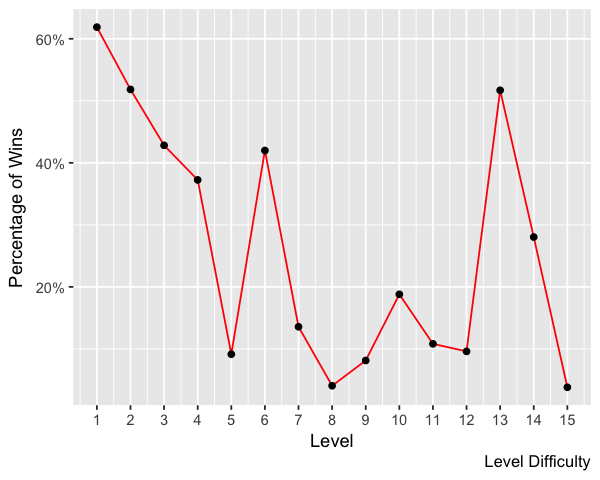

In [9]:
# Plotting the level difficulty profile

ggplot(data=level_difficult, aes(x=level, y=probability_of_win, group=1)) +
  geom_line(color="red")+
  geom_point()+
  scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15))+
  scale_y_continuous(labels=scales::percent)+
  labs(x = "Level", y = "Percentage of Wins", caption = "Level Difficulty")

## 6. Spotting hard levels
<p>What constitutes a <em>hard</em> level is subjective. However, to keep things simple, I define a threshold of difficulty of 10%, and label levels with <em>p<sub>win</sub></em> &lt; 10% as <em>hard</em>. It's relatively easy to spot these hard levels on the plot, but we can make the plot more friendly by explicitly highlighting the hard levels.</p>

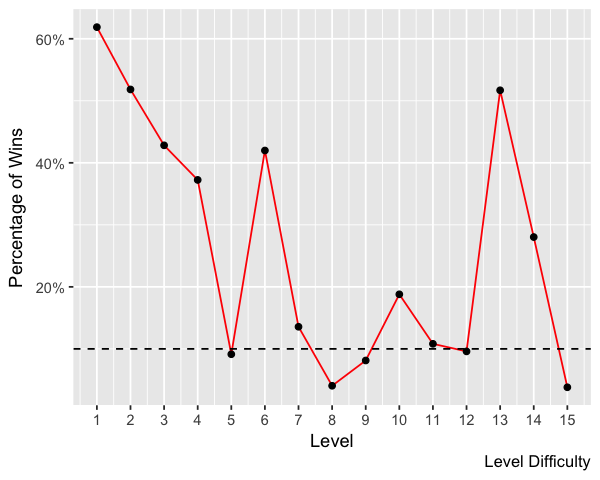

In [21]:
# Adding points and a dashed line

ggplot(data=level_difficult, aes(x=level, y=probability_of_win), group=1) +
  geom_line(color="red")+
  geom_point()+
  geom_hline(yintercept = .10, linetype='dashed')+
  scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15))+
  scale_y_continuous(labels=scales::percent)+
  labs(x = "Level", y = "Percentage of Wins", caption = "Level Difficulty")


## 7. Computing uncertainty
Here I will simply use the <em>Standard error</em></a> as a measure of uncertainty:</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_139/img/latex2.png" style="width:115px"></p>
<!-- $$
\sigma_{error} \approx \frac{\sigma_{sample}}{\sqrt{n}}
$$ -->
<p>Here <em>n</em> is the number of datapoints and <em>σ<sub>sample</sub></em> is the sample standard deviation. For a Bernoulli process, the sample standard deviation is: </p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_139/img/latex3.png" style="width:195px"></p>
<!-- $$
\sigma_{sample} = \sqrt{p_{win} (1 - p_{win})} 
$$ -->
<p>Therefore, we can calculate the standard error like this:</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_139/img/latex4.png" style="width:195px"></p>
<!-- $$
\sigma_{error} \approx \sqrt{\frac{p_{win}(1 - p_{win})}{n}}
$$ -->


In [23]:
# Computing the standard error of p_win for each level
level_difficult <- level_difficult %>%
  mutate(std_error = sqrt(probability_of_win * (1 - probability_of_win) / attempts))

level_difficult

level,attempts,wins,probability_of_win,std_error
1,1322,818,0.61875946,0.013358101
2,1285,666,0.51828794,0.013938876
3,1546,662,0.42820181,0.012584643
4,1893,705,0.37242472,0.011111607
5,6937,634,0.09139397,0.003459878
6,1591,668,0.41986172,0.012373251
7,4526,614,0.13566063,0.005089930
8,15816,641,0.04052858,0.001568008
9,8241,670,0.08130081,0.003010538
10,3282,617,0.18799512,0.006819983


## 8. Showing uncertainty
<p>Now that we have a measure of uncertainty for each levels' difficulty estimate let's use <em>error bars</em> to show this uncertainty in the plot. We will set the length of the error bars to one standard error. The upper limit and the lower limit of each error bar should then be <em>p<sub>win</sub></em> + <em>σ<sub>error</sub></em> and <em>p<sub>win</sub></em> - <em>σ<sub>error</sub></em>, respectively.</p>

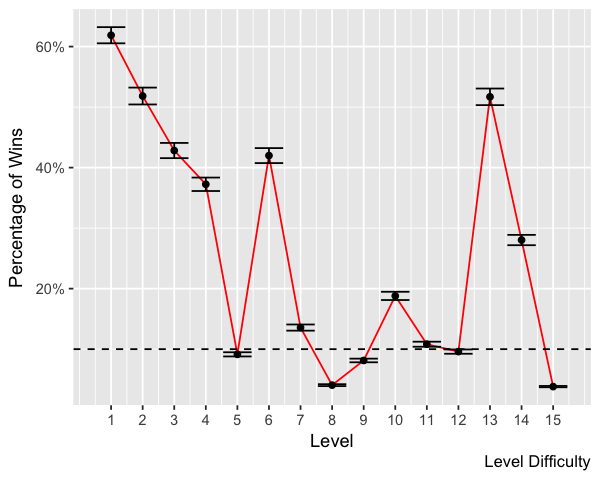

In [24]:
# Adding standard error bars

ggplot(data=level_difficult, aes(x=level, y=probability_of_win), group=1) +
  geom_line(color="red")+
  geom_point()+
  geom_hline(yintercept = .10, linetype='dashed')+
  geom_errorbar(aes(ymin = probability_of_win - std_error, ymax = probability_of_win + std_error))+
  scale_x_continuous(breaks=c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15))+
  scale_y_continuous(labels=scales::percent)+
  labs(x = "Level", y = "Percentage of Wins", caption = "Level Difficulty")

## 9. Probability of completing the episode without losing a single time
<p>One question a level designer might ask is: "How likely is it that a player will complete the episode without losing a single time?" </p>

In [26]:
# The probability of completing the episode without losing a single time
p_withoutLosing <- prod(level_difficult$probability_of_win)

p_withoutLosing


[1] 9.447141e-12

## 10. Should our level designer worry?
<p>Given the probability we just calculated, should our level designer worry about that a lot of players might complete the episode in one attempt?</p>

In [29]:
# Should our level designer worry about that a lot of 
# players will complete the episode in one attempt?
print("should_the_designer_worry = FALSE")

[1] "should_the_designer_worry = FALSE"
